In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

In [2]:
# import the dataset
data = pd.read_csv(r'laptop_price.csv',encoding='latin-1')
data.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1232,1250,Dell,Inspiron 3567,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,469.01
22,23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
182,186,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,1849.00


In [3]:
data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# check missing values and duplicate values
def count_percent(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()*100/data.shape[0],
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()*100/data.shape[0]
                                })
    return data_columns
count_percent(data)       

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
laptop_ID,0,0.0,0,0.0
Company,0,0.0,0,0.0
Product,0,0.0,0,0.0
TypeName,0,0.0,0,0.0
Inches,0,0.0,0,0.0
ScreenResolution,0,0.0,0,0.0
Cpu,0,0.0,0,0.0
Ram,0,0.0,0,0.0
Memory,0,0.0,0,0.0
Gpu,0,0.0,0,0.0


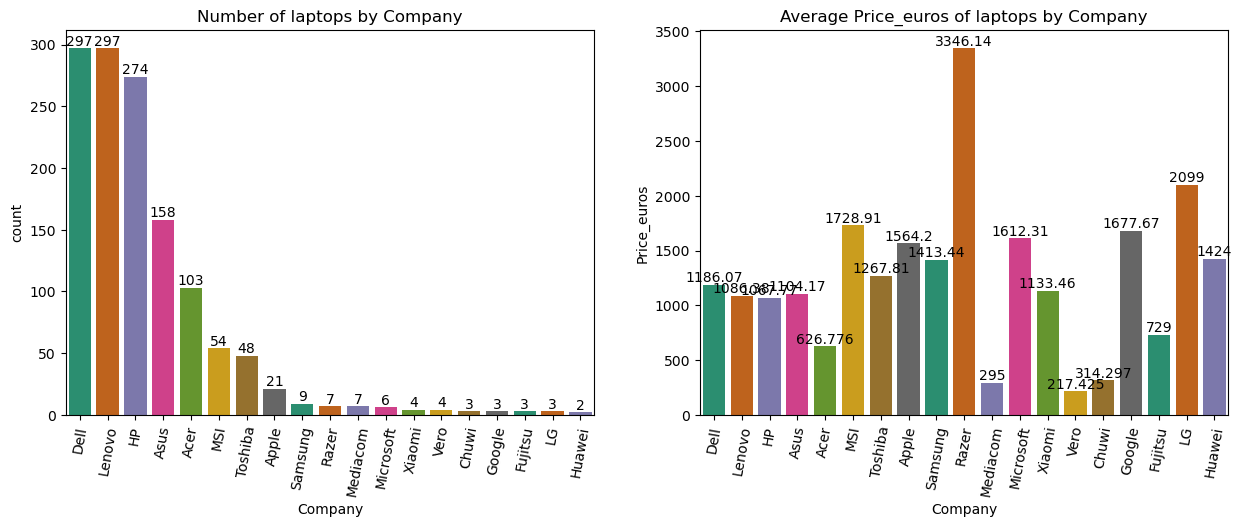

In [6]:
def count_n_price_plot(col1,col2):
    fig, ax  = plt.subplots(figsize=(15,5))
    
    plt.subplot(1,2,1)
    ax=sns.countplot(x=col1, data=data, palette='Dark2', order = data[col1].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    ax.bar_label(ax.containers[0])
    plt.title('Number of laptops by {0}'.format(col1))

    plt.subplot(1,2,2)
    ax=sns.barplot( x=col1, y=col2, data=data, order=data[col1].value_counts().index, palette='Dark2', ci=False)
    plt.xticks(rotation=80)
    ax.bar_label(ax.containers[0])
    plt.title('Average {1} of laptops by {0}'.format(col1,col2))
    
    plt.show()


count_n_price_plot('Company','Price_euros')

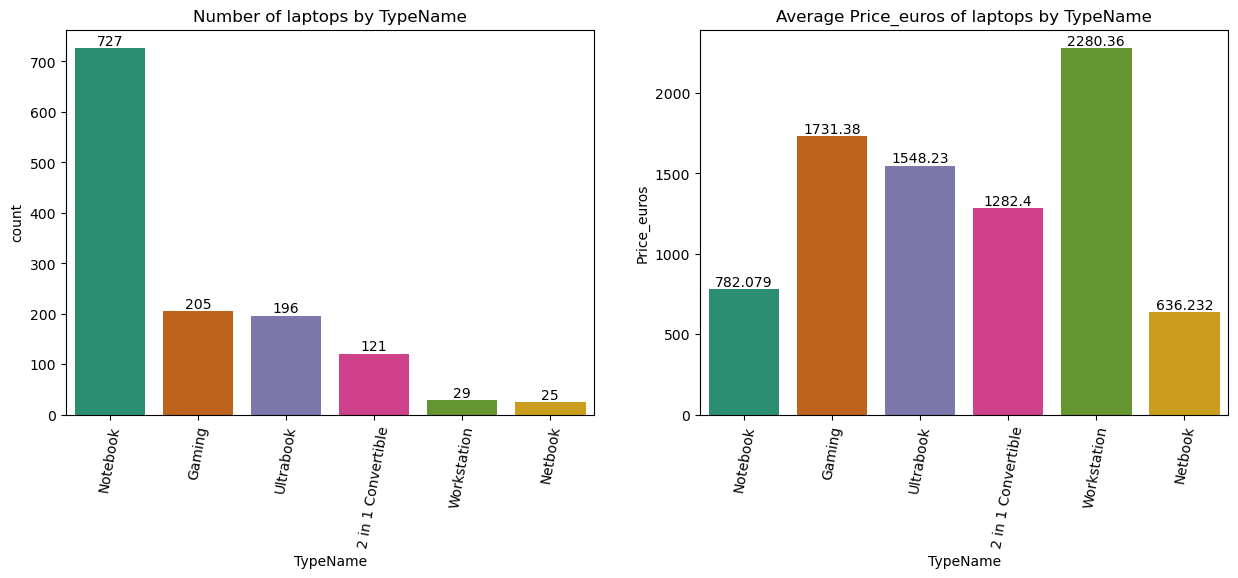

In [7]:
count_n_price_plot('TypeName', 'Price_euros')

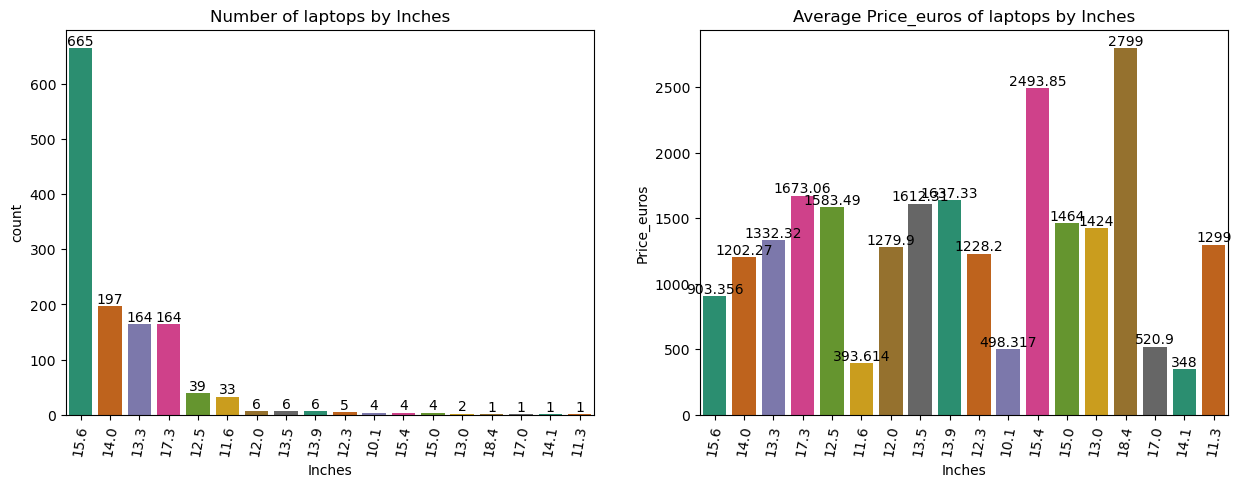

In [8]:
count_n_price_plot('Inches', 'Price_euros')

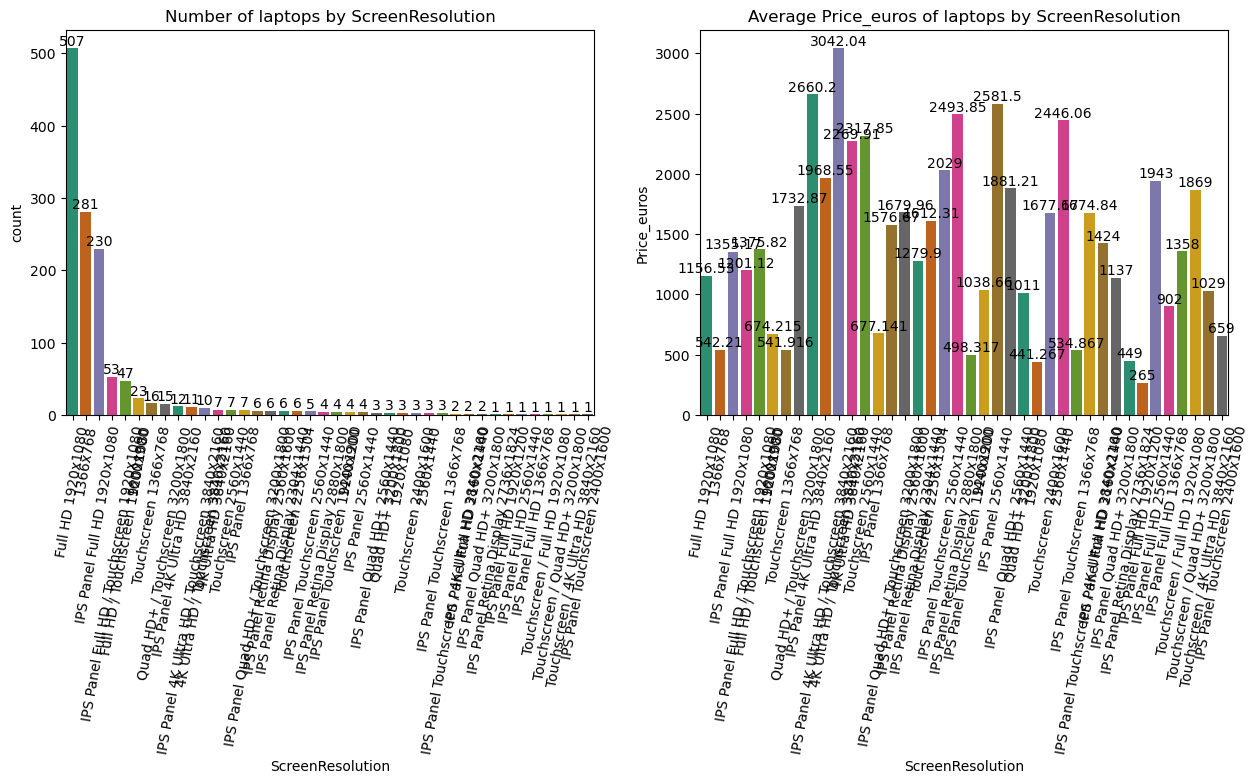

In [9]:
count_n_price_plot('ScreenResolution', 'Price_euros')

In [10]:
data.groupby(['ScreenResolution']).count().sort_values(by='ScreenResolution')

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
ScreenResolution,,,,,,,,,,,,
1366x768,281,281,281,281,281,281,281,281,281,281,281,281
1440x900,4,4,4,4,4,4,4,4,4,4,4,4
1600x900,23,23,23,23,23,23,23,23,23,23,23,23
1920x1080,3,3,3,3,3,3,3,3,3,3,3,3
2560x1440,3,3,3,3,3,3,3,3,3,3,3,3
4K Ultra HD / Touchscreen 3840x2160,10,10,10,10,10,10,10,10,10,10,10,10
4K Ultra HD 3840x2160,7,7,7,7,7,7,7,7,7,7,7,7
Full HD / Touchscreen 1920x1080,47,47,47,47,47,47,47,47,47,47,47,47
Full HD 1920x1080,507,507,507,507,507,507,507,507,507,507,507,507


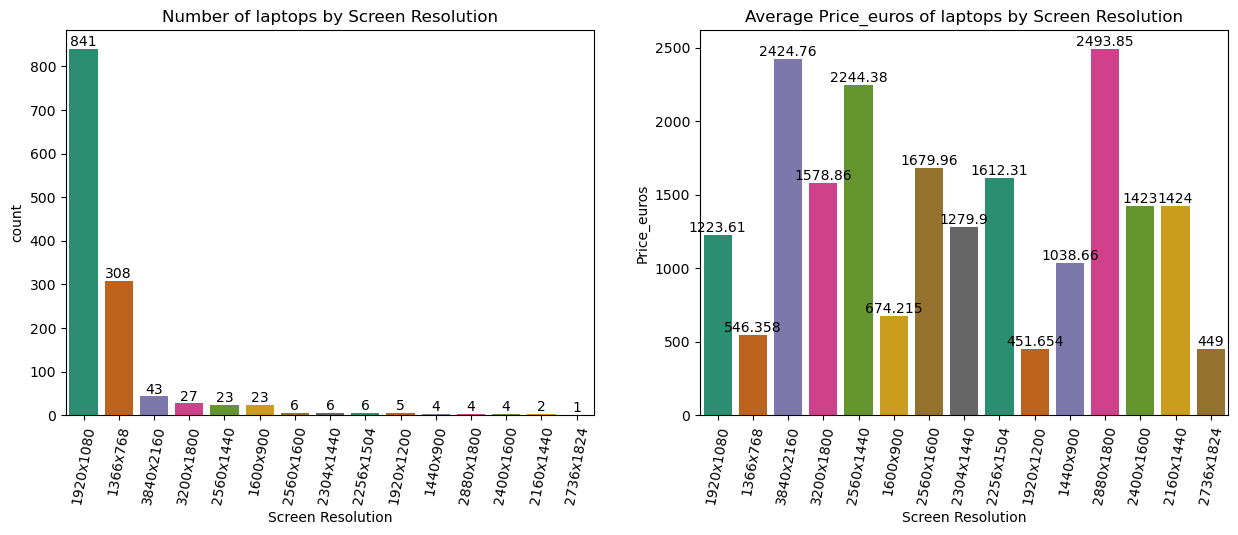

In [11]:
# Preprocessing of Screen Resolution
new = data['ScreenResolution'].str.split('x',n=1,expand=True)
new[0] = new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data['Screen Resolution'] = (new[0]+'x'+new[1])
data['X_res'] = new[0]
data['Y_res'] = new[1]
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

count_n_price_plot('Screen Resolution','Price_euros')

In [12]:
# New Column: Full HD
data['fullhd1']=data['Screen Resolution'].apply(lambda x:1 if '1366x768' in x else 0)
data['fullhd2']=data['Screen Resolution'].apply(lambda x:1 if '1440x900' in x else 0)
data['fullhd3']=data['Screen Resolution'].apply(lambda x:1 if '1600x900'  in x else 0)
data['fullhd4']=data['Screen Resolution'].apply(lambda x:1 if '1920x1080' in x else 0)
data['Full HD']=(data['fullhd1']+data['fullhd2']+data['fullhd3']+data['fullhd4'])

# New Column: Quad HD+
data['quadhd1']=data['Screen Resolution'].apply(lambda x:1 if '1920x1200' in x else 0)
data['quadhd2']=data['Screen Resolution'].apply(lambda x:1 if '2160x1440' in x else 0)
data['quadhd3']=data['Screen Resolution'].apply(lambda x:1 if '2256x1504' in x else 0)
data['quadhd4']=data['Screen Resolution'].apply(lambda x:1 if '2304x1440' in x else 0)
data['quadhd5']=data['Screen Resolution'].apply(lambda x:1 if '2400x1600' in x else 0)
data['quadhd6']=data['Screen Resolution'].apply(lambda x:1 if '2560x1440' in x else 0)
data['quadhd7']=data['Screen Resolution'].apply(lambda x:1 if '2560x1600' in x else 0)
data['Quad HD+'] = (data['quadhd1']+data['quadhd2']+data['quadhd3']+data['quadhd4']+data['quadhd5']+data['quadhd6']+data['quadhd7'])

# New Column: 4K Ultra HD
data['ultrahd1']=data['Screen Resolution'].apply(lambda x:1 if '2736x1824' in x else 0)
data['ultrahd2']=data['Screen Resolution'].apply(lambda x:1 if '2880x1800' in x else 0)
data['ultrahd3']=data['Screen Resolution'].apply(lambda x:1 if '3200x1800' in x else 0)
data['ultrahd4']=data['Screen Resolution'].apply(lambda x:1 if '3840x2160' in x else 0)
data['4K Ultra HD'] = (data['ultrahd1']+data['ultrahd2']+data['ultrahd3']+data['ultrahd4'])

# New Column: IPS
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
# New Column: TouchScreen
data['Touch Screen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# Drop unnecessary columns
data.drop(columns=['ScreenResolution','fullhd1','fullhd2','fullhd3','fullhd4',
                    'quadhd1','quadhd2','quadhd3','quadhd4','quadhd5','quadhd6','quadhd7',
                    'ultrahd1','ultrahd2','ultrahd3','ultrahd4'], inplace=True)

data.groupby(['Full HD','4K Ultra HD','Quad HD+']).count().sort_values(by='Full HD')

laptop_ID  Company  Product  TypeName  Inches  \
Full HD 4K Ultra HD Quad HD+                                                  
0       0           1                52       52       52        52      52   
        1           0                75       75       75        75      75   
1       0           0              1176     1176     1176      1176    1176   

                               Cpu   Ram  Memory   Gpu  OpSys  Weight  \
Full HD 4K Ultra HD Quad HD+                                            
0       0           1           52    52      52    52     52      52   
        1           0           75    75      75    75     75      75   
1       0           0         1176  1176    1176  1176   1176    1176   

                              Price_euros  Screen Resolution  X_res  Y_res  \
Full HD 4K Ultra HD Quad HD+                                                 
0       0           1                  52                 52     52     52   
        1           0                  75                 75     75     75   
1       0           0                1176               1176   1176   1176   

                               IPS  Touch Screen  
Full HD 4K Ultra HD Quad HD+                      
0       0           1           52            52  
        1           0           75            75  
1       0           0         1176          1176

In [13]:
data.groupby(['IPS','Touch Screen']).count().sort_values(by='Touch Screen')

,,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Resolution,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD
IPS,Touch Screen,,,,,,,,,,,,,,,,,,
0,0,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831,831
1,0,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
0,1,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
1,1,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85


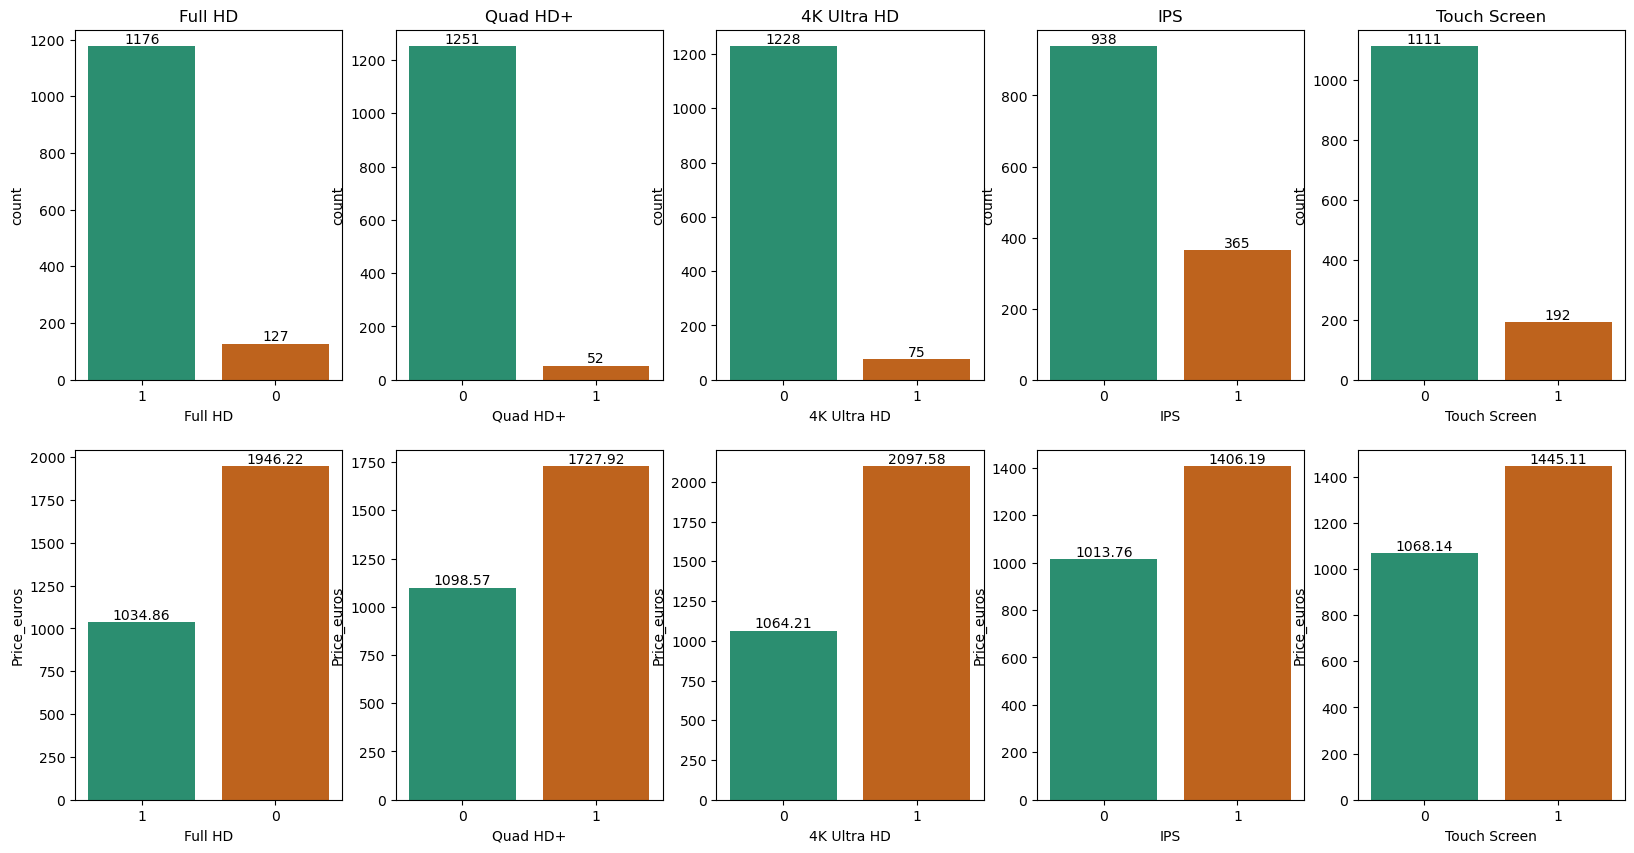

In [14]:
def tech_count_n_price_plot(col1,col2,col3,col4,col5,col6):
    fig, ax  = plt.subplots(figsize=(20,10))
    plt.subplot(2,5,1)
    ax=sns.countplot(x=col1, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col1].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col1)

    plt.subplot(2,5,2)
    ax=sns.countplot(x=col2, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col2].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col2)
    
    plt.subplot(2,5,3)
    ax=sns.countplot(x=col3, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col3].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col3)
    
    plt.subplot(2,5,4)
    ax=sns.countplot(x=col4, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col4].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col4)
    
    plt.subplot(2,5,5)
    ax=sns.countplot(x=col5, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col5].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col5)
    
    plt.subplot(2,5,6)
    ax=sns.barplot( x=col1, 
                    y=col6, 
                    data=data,
                    order=data[col1].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,7)
    ax=sns.barplot( x=col2, 
                    y=col6, 
                    data=data,
                    order=data[col2].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,8)
    ax=sns.barplot( x=col3, 
                    y=col6, 
                    data=data,
                    order=data[col3].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])
    
    plt.subplot(2,5,9)
    ax=sns.barplot( x=col4, 
                    y=col6, 
                    data=data,
                    order=data[col4].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,10)
    ax=sns.barplot( x=col5, 
                    y=col6, 
                    data=data,
                    order=data[col5].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])
            
    plt.show()


tech_count_n_price_plot('Full HD','Quad HD+','4K Ultra HD','IPS','Touch Screen','Price_euros')

In [15]:
data['Cpu'].value_counts().sample(10)

Intel Core i3 6006U 2.2GHz         1
Intel Core i7 7500U 2.7GHz       134
Intel Core M 6Y75 1.2GHz           5
AMD A12-Series 9720P 3.6GHz        5
Intel Core i7 6700HQ 2.6GHz       43
AMD E-Series 7110 1.8GHz           2
Intel Xeon E3-1535M v5 2.9GHz      1
AMD FX 9830P 3GHz                  1
Intel Core i5 6260U 1.8GHz         1
Intel Core i5 7500U 2.7GHz         1
Name: Cpu, dtype: int64

In [16]:
# pre processing of CPU Name
data['CPU Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data['CPU Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [17]:
def fetch_processor1(text):
    if text.split()[0] == 'AMD':
        return (text.split()[0]+" "+text.split()[1])
    else:
        return text

data['CPU Name'] = data['CPU Name'].apply(fetch_processor1)
data['CPU Name'].value_counts()

Intel Core i7             527
Intel Core i5             423
Intel Core i3             136
Intel Celeron Dual         80
Intel Pentium Quad         27
Intel Core M               19
AMD A9-Series              17
AMD A6-Series              11
AMD E-Series                9
Intel Celeron Quad          8
AMD A12-Series              8
AMD A10-Series              6
Intel Atom x5-Z8350         5
AMD A8-Series               4
Intel Atom x5-Z8550         4
AMD Ryzen                   4
Intel Pentium Dual          3
Intel Xeon E3-1505M         2
AMD FX                      2
Intel Xeon E3-1535M         2
Intel Atom X5-Z8350         2
Intel Atom x5-Z8300         1
Intel Atom Z8350            1
AMD A4-Series               1
Samsung Cortex A72&A53      1
Name: CPU Name, dtype: int64

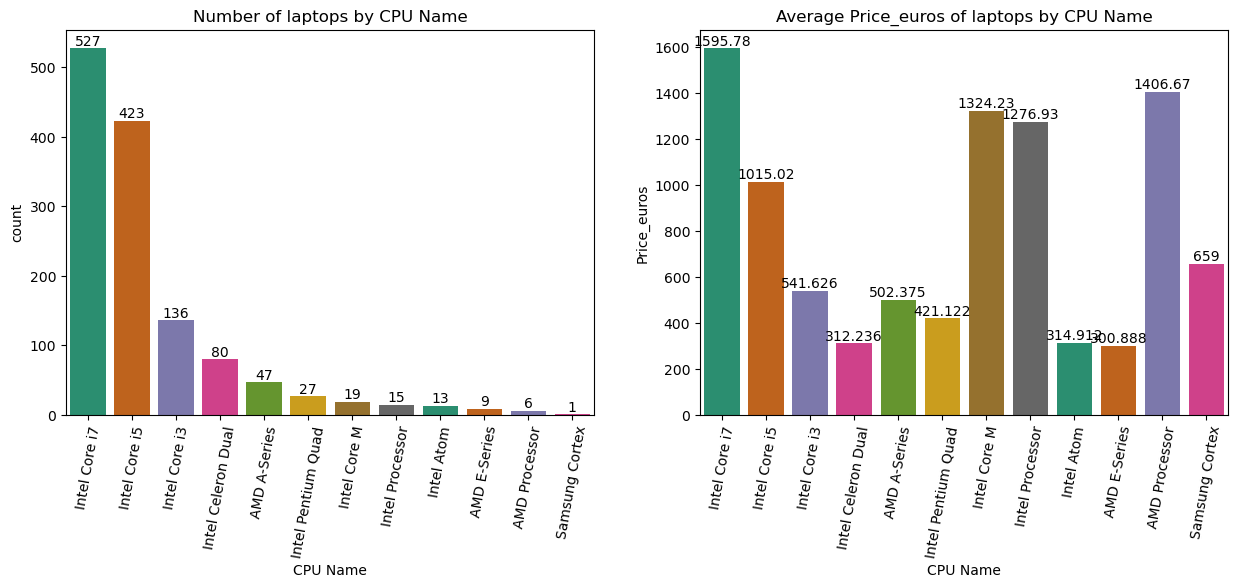

In [18]:
def fetch_processor2(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'Intel Celeron Dual', 'Intel Pentium Quad',
                'Intel Core M',]:
        return text
    elif text in ['AMD A9-Series','AMD A6-Series','AMD A12-Series','AMD A10-Series','AMD A8-Series','AMD A4-Series']:
        return 'AMD A-Series'
    else:
        if text.split()[1] == 'Atom':
            return 'Intel Atom'
        elif text.split()[1] == 'E-Series':
            return 'AMD E-Series'
        elif text.split()[0] == 'Intel':
            return 'Intel Processor'
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'    
        else:
            return (text.split()[0]+" "+text.split()[1])

data['CPU Name'] = data['CPU Name'].apply(fetch_processor2)

count_n_price_plot('CPU Name','Price_euros')

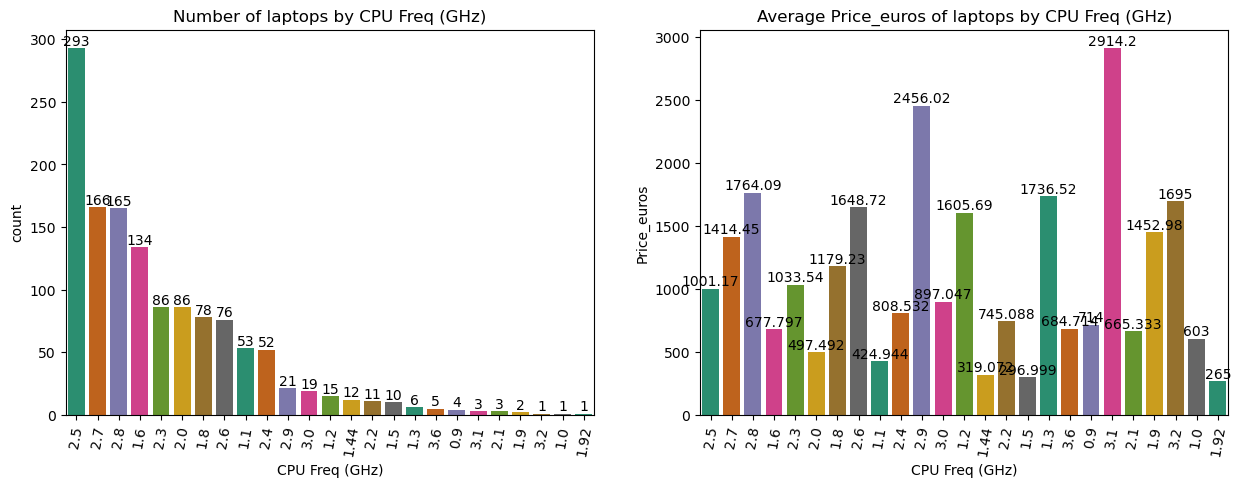

In [19]:
new2 = data['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
data['CPU Freq (GHz)'] = new2[0].str.replace('GHz','').astype(float)
count_n_price_plot('CPU Freq (GHz)','Price_euros')

data.drop(columns='Cpu',inplace=True)

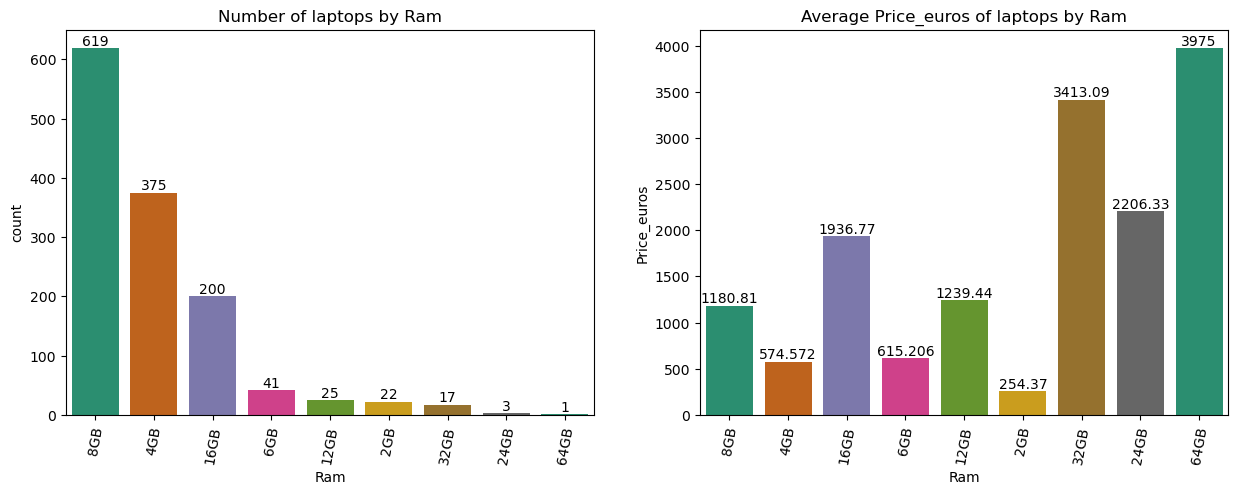

In [20]:
count_n_price_plot('Ram','Price_euros')

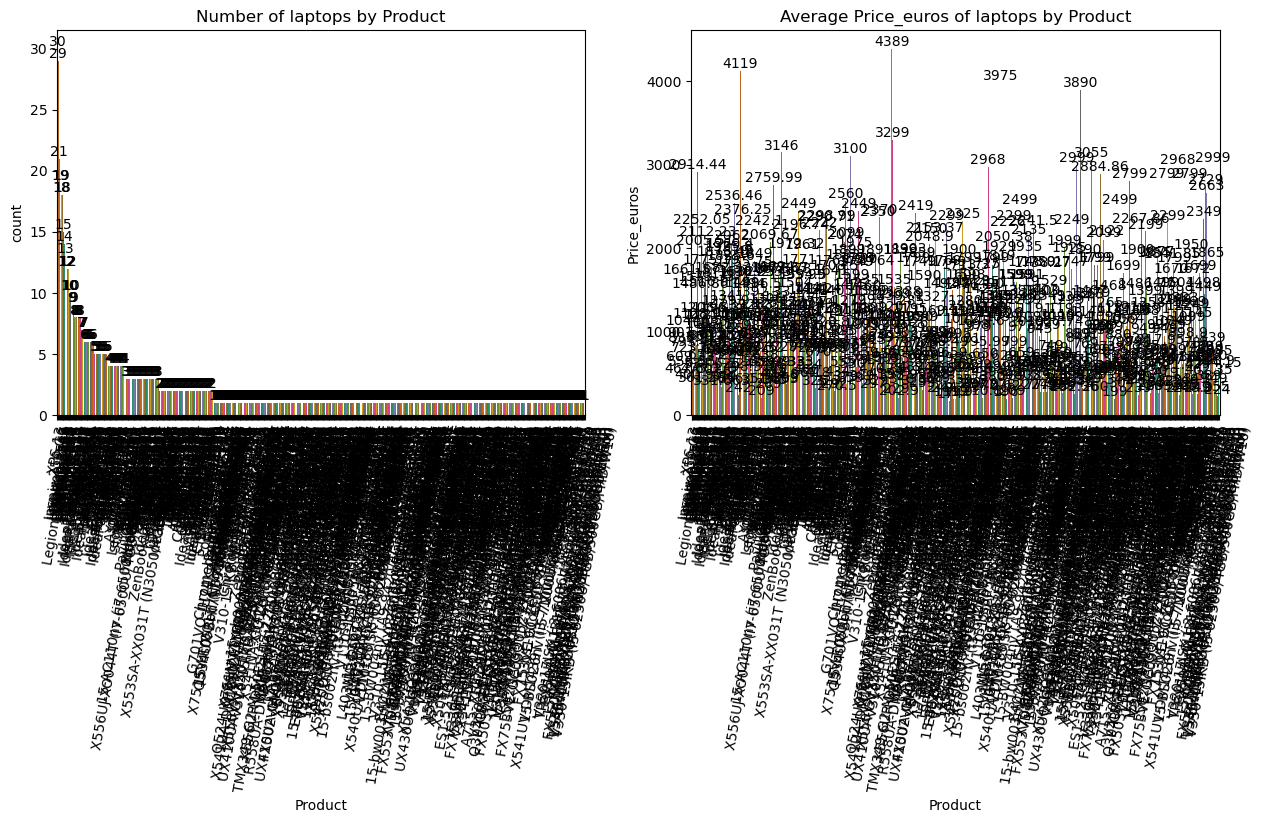

In [21]:
count_n_price_plot('Product','Price_euros')

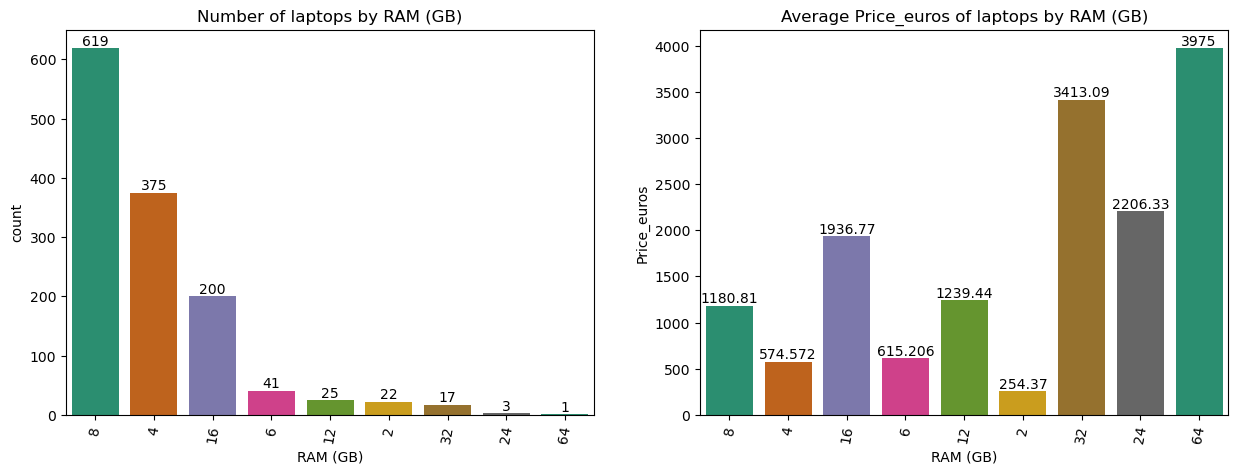

In [22]:
data['RAM (GB)'] = data['Ram'].str.replace("GB", "").astype(int)  # Converting object data type to int data type
count_n_price_plot('RAM (GB)','Price_euros')
data.drop(columns=['Ram'],inplace=True)

In [23]:
data['Memory'].value_counts().sample(20)

512GB SSD                    118
128GB SSD +  2TB HDD           2
32GB Flash Storage            38
16GB Flash Storage             7
32GB HDD                       1
128GB HDD                      1
512GB SSD +  1.0TB Hybrid      1
508GB Hybrid                   1
1TB HDD +  1TB HDD             1
500GB HDD                    132
32GB SSD                       6
1TB SSD                       14
180GB SSD                      5
16GB SSD                       3
256GB SSD +  500GB HDD         2
256GB SSD +  2TB HDD          10
64GB Flash Storage            15
512GB SSD +  512GB SSD         1
512GB SSD +  1TB HDD          14
512GB SSD +  256GB SSD         1
Name: Memory, dtype: int64

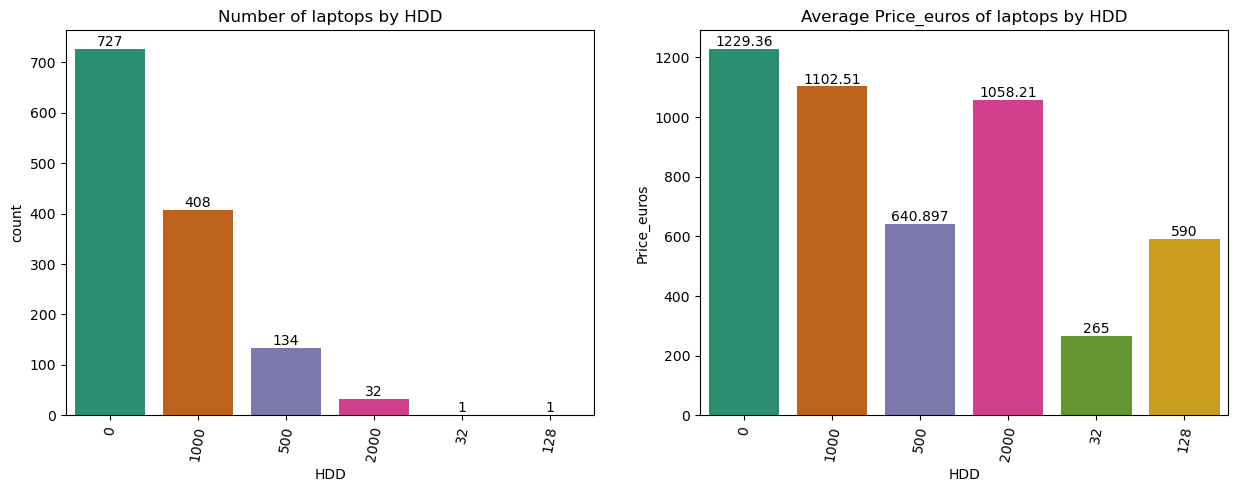

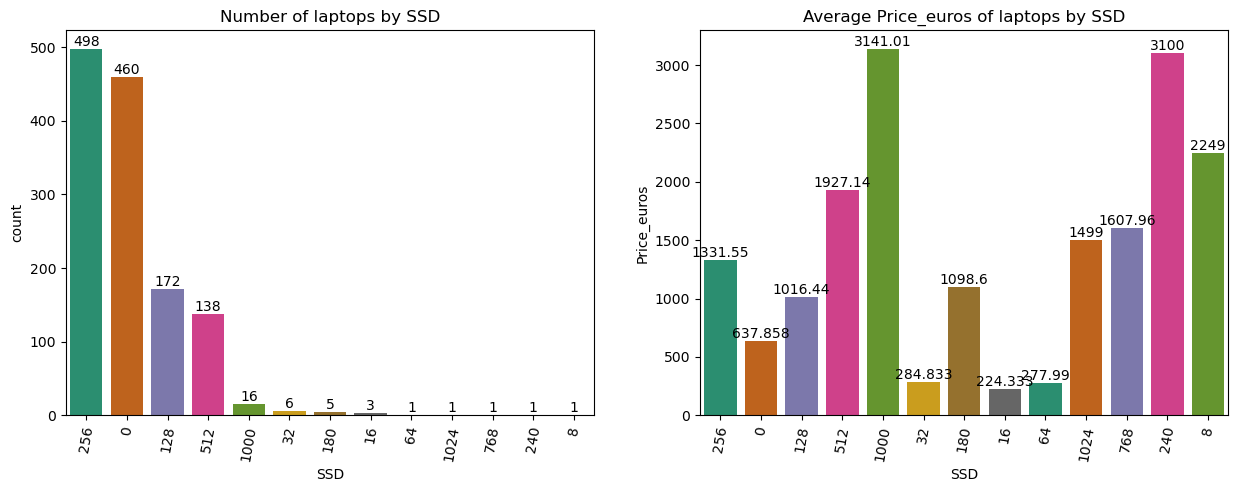

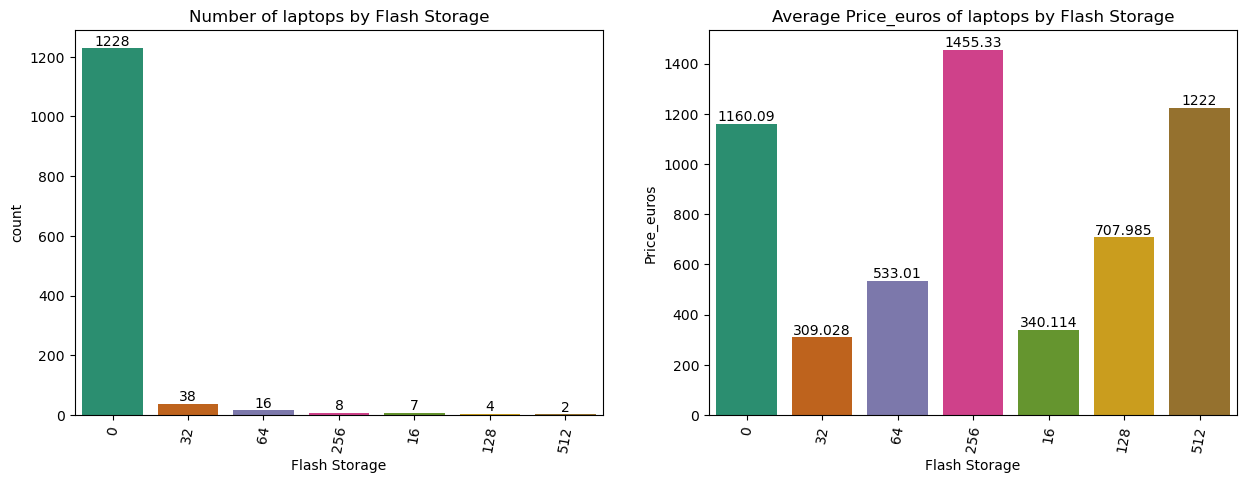

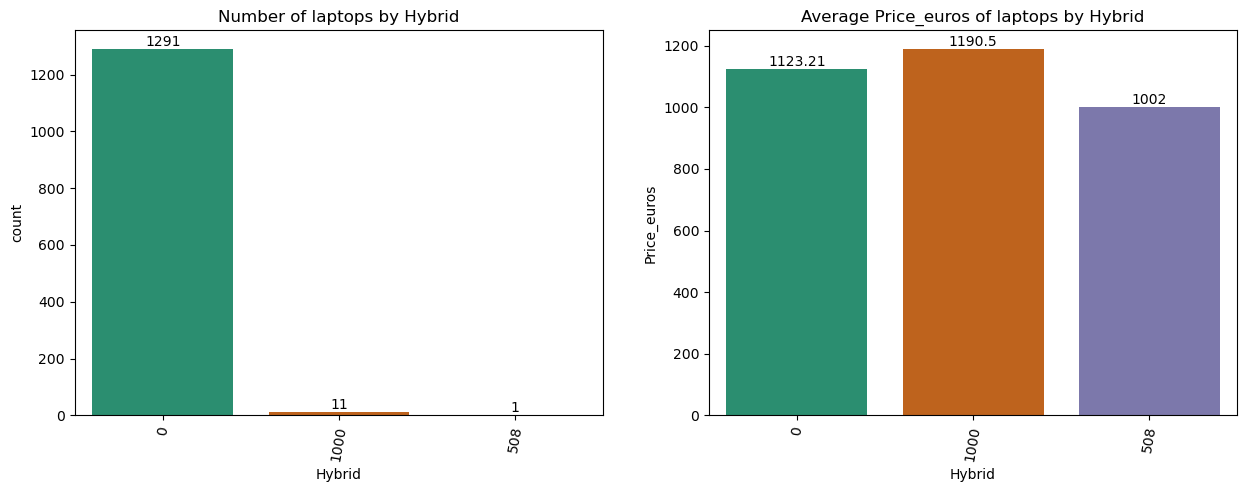

In [24]:
# preprocessing of Memory
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)  
data['Memory'] = data['Memory'].str.replace('GB', '')   
data['Memory'] = data['Memory'].str.replace('TB', '000')
new3 = data['Memory'].str.split('+', n=1, expand=True)  

data['first'] = new3[0]     
data['second'] = new3[1]
data['second'].fillna("0", inplace=True) 

data['Layer1HDD'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['Layer2HDD'] = data['second'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')  
data['first'] = data['first'].astype(int)

data['second'] = data['second'].str.replace(r'\D', '')
data['second'] = data['second'].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])  
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])  
data["Flash Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])

data.drop(columns=['Memory','first', 'Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                   'second','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'], inplace=True)
                                         
# Plotting bar plot for HDD, SSD, Hybrid, Flash Storage and price comparison
count_n_price_plot('HDD','Price_euros')
count_n_price_plot('SSD','Price_euros')
count_n_price_plot('Flash Storage','Price_euros')
count_n_price_plot('Hybrid','Price_euros')

In [25]:
data = data[(data['Hybrid'] != 1000)]
data = data[(data['Hybrid'] != 508)]
data.drop(columns='Hybrid',inplace=True)
data= data.reset_index(drop=True)

In [26]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      183
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 109, dtype: int64

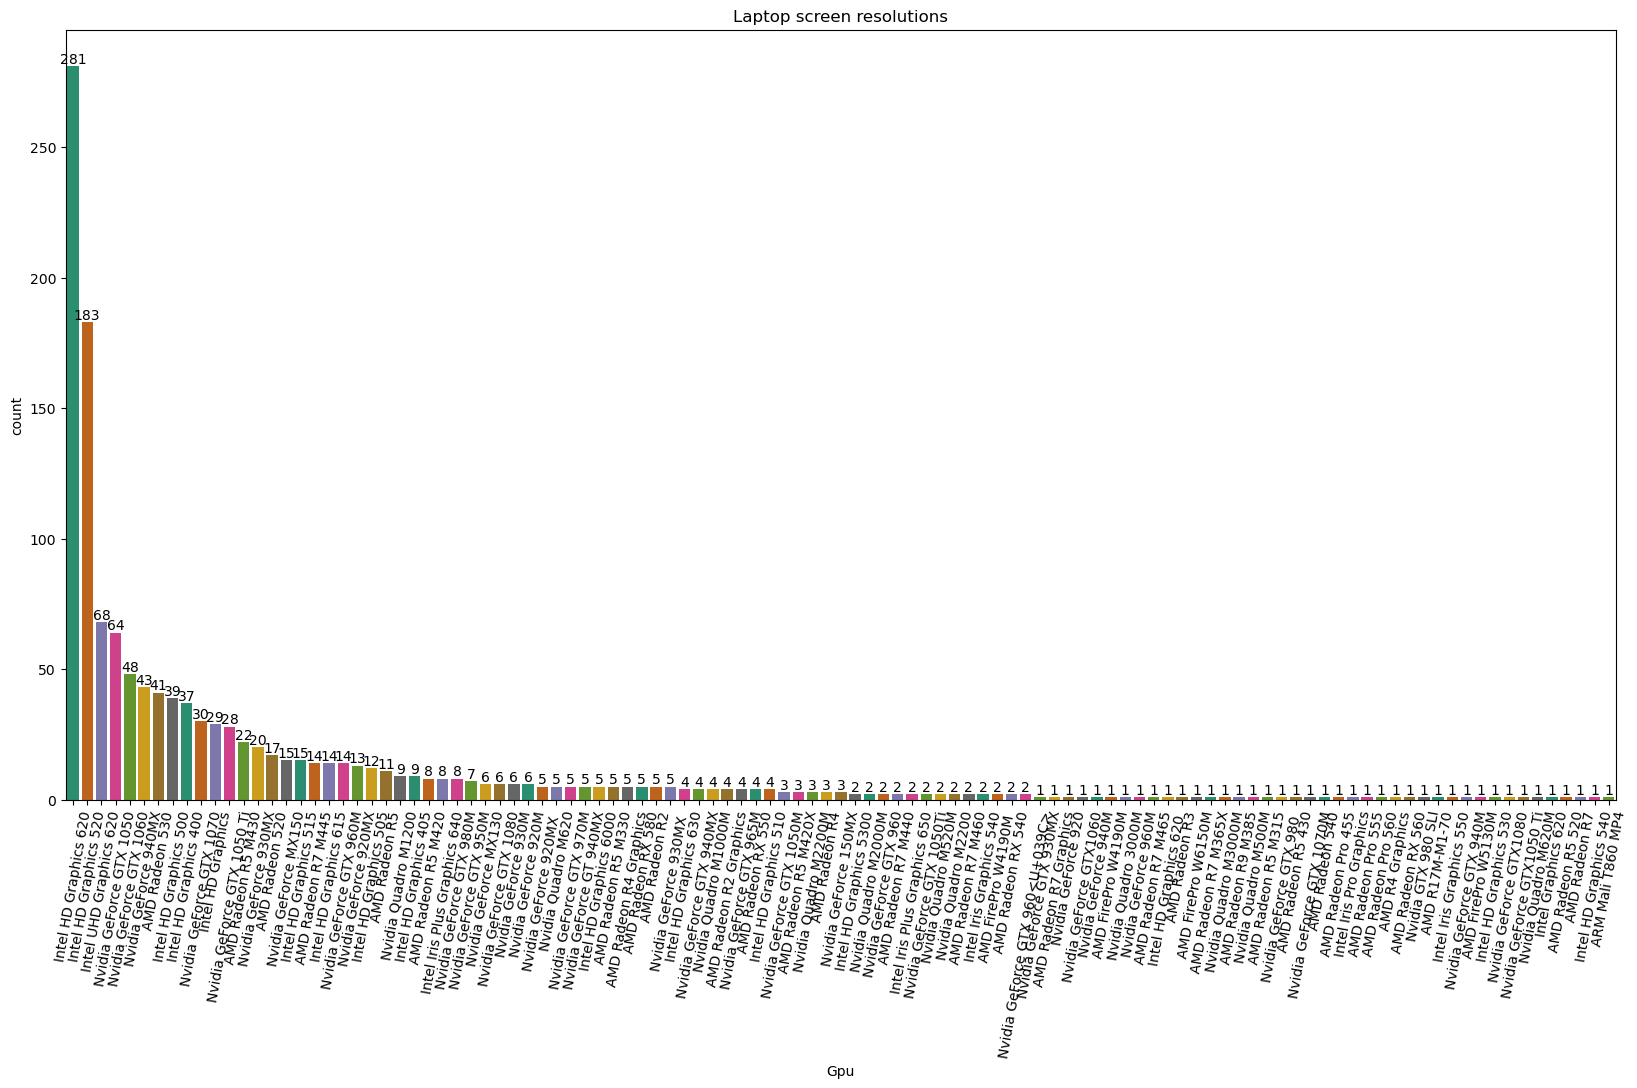

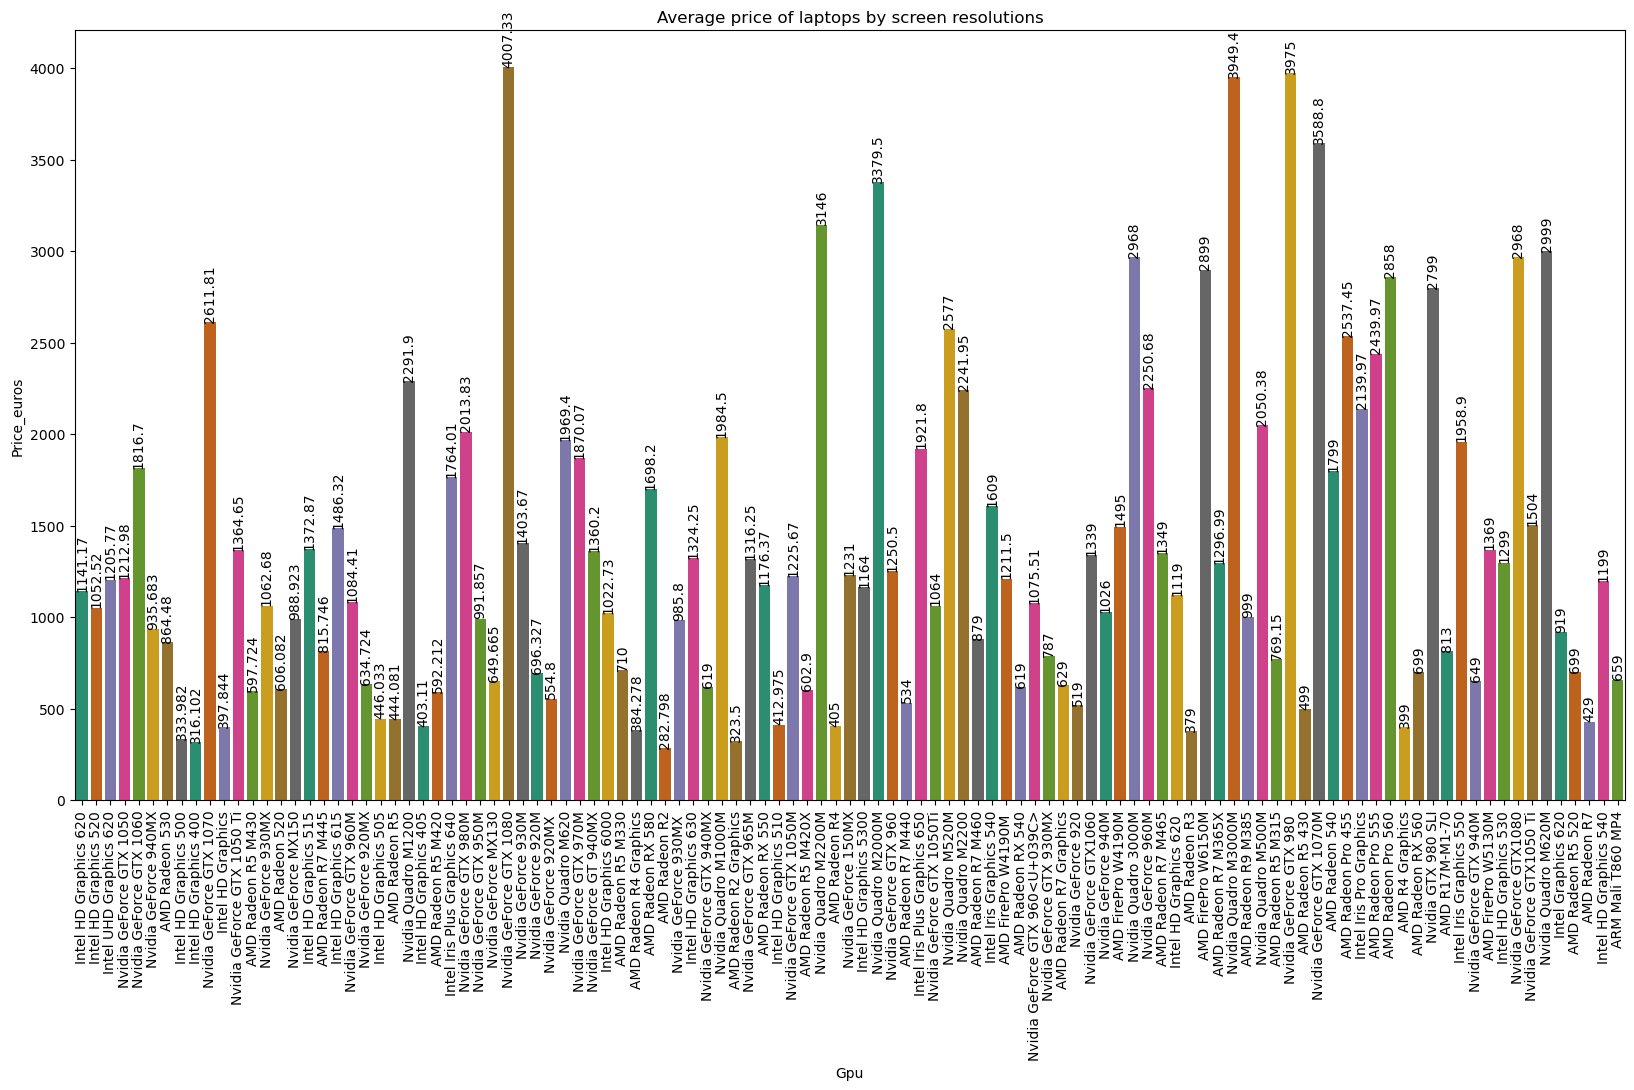

In [27]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='Gpu', data=data, palette='Dark2', order = data['Gpu'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop screen resolutions')
plt.show()

plt.figure(figsize=(20,10))
ax=sns.barplot(x='Gpu', y='Price_euros',
                data=data,
                order=data['Gpu'].value_counts().index, 
                palette='Dark2', 
                ci=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0], rotation=90)
plt.title('Average price of laptops by screen resolutions')
plt.show()

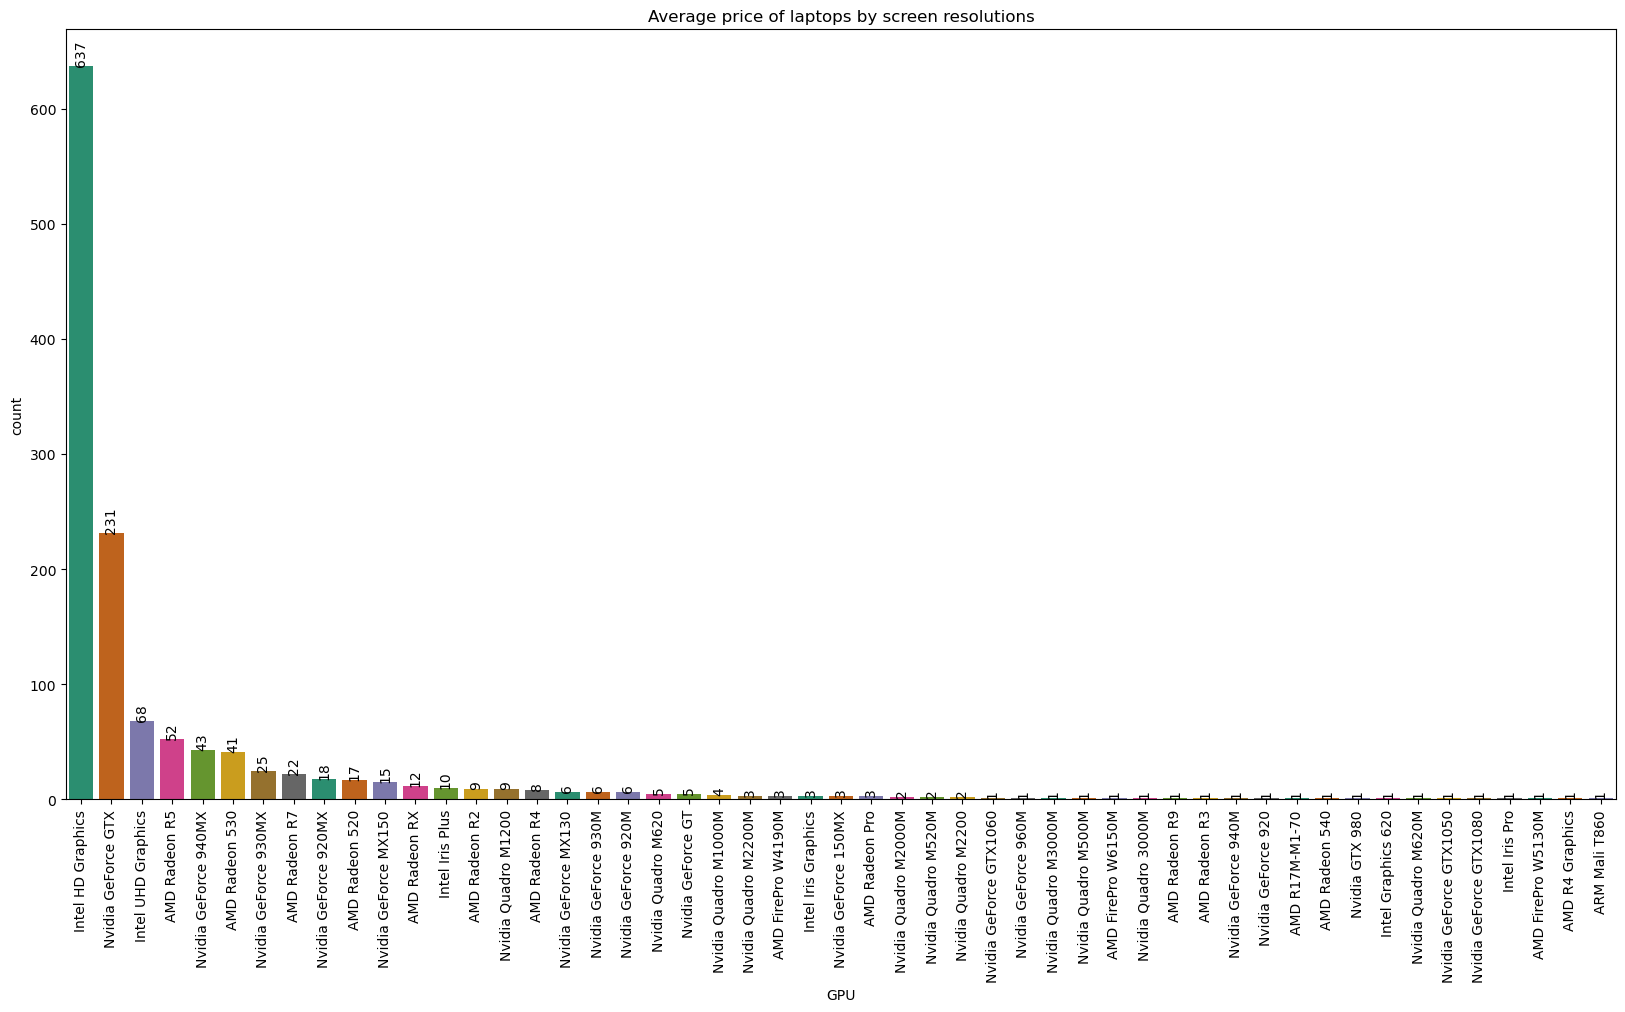

In [28]:
data['GPU'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:3]))

plt.figure(figsize=(20,10))
ax=sns.countplot(x='GPU',data=data,palette='Dark2',order=data['GPU'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0], rotation=90)
plt.title('Average price of laptops by screen resolutions')
plt.show()

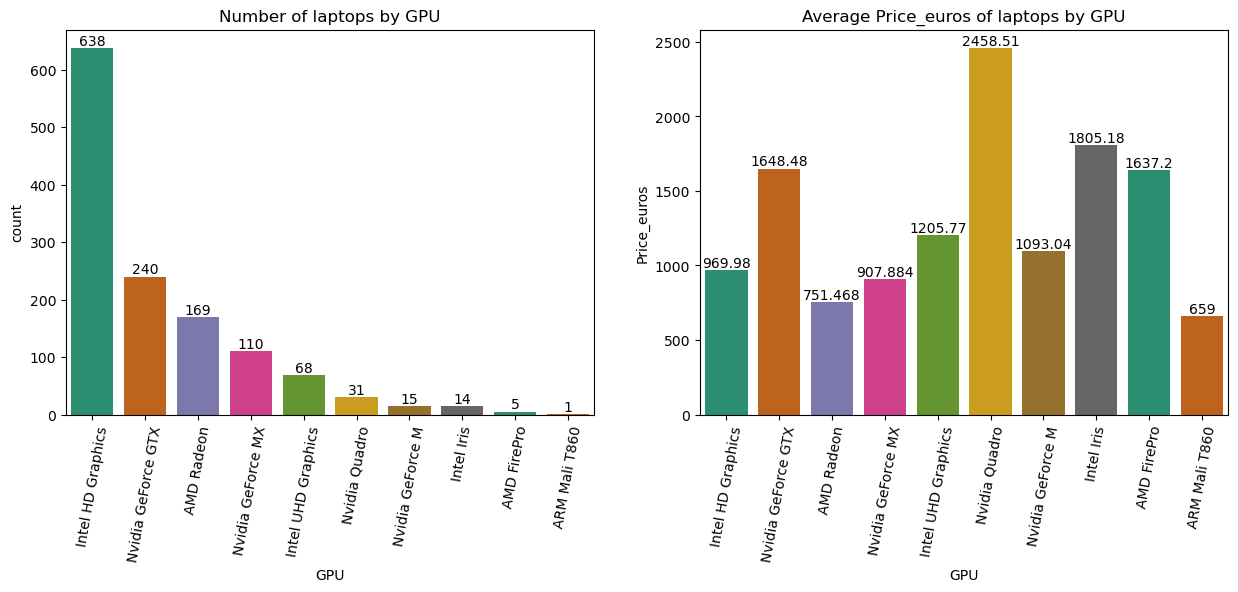

In [29]:
# preprocessing of GPU field
def fetch_gpu(text):
    if text in ['Intel HD Graphics','Intel UHD Graphics']:
        return text

    elif text in ['Intel Graphics 620']:
        return 'Intel HD Graphics'

    elif text in ['Intel Iris Pro','Intel Iris Graphics','Intel Iris Plus']:
        return 'Intel Iris'

    elif text in['Nvidia GeForce GTX','Nvidia GeForce GT','Nvidia GeForce GTX1050',
                'Nvidia GeForce GTX1060','Nvidia GeForce GTX1080','Nvidia GTX 980']:
        return 'Nvidia GeForce GTX' 

    elif text in['Nvidia GeForce 940MX', 'Nvidia GeForce 930MX','Nvidia GeForce 150MX',
                'Nvidia GeForce MX130','Nvidia GeForce MX150','Nvidia GeForce 920MX']:
        return 'Nvidia GeForce MX'

    elif text in['Nvidia GeForce 940M','Nvidia GeForce 960M','Nvidia GeForce 930M',
                'Nvidia GeForce 920M','Nvidia GeForce 920']:
        return 'Nvidia GeForce M'

    elif text.split()[1] == 'Quadro':
        return 'Nvidia Quadro'

    elif text.split()[1] == 'Radeon':
        return 'AMD Radeon'

    elif text in ['AMD R4 Graphics','AMD R17M-M1-70']:
        return 'AMD Radeon'
        
    elif text.split()[1] == 'FirePro':
        return 'AMD FirePro'
    else:   
        if text.split()[0] == 'Intel':
            return 'Intel GPU'
        elif text.split()[0] == 'Nvidia':
            return 'Nvidia GPU' 
        elif text.split()[0] == 'AMD':
            return 'AMD GPU'
        else:
            return text
data['GPU'] = data['GPU'].apply(fetch_gpu)

count_n_price_plot('GPU','Price_euros')
data.drop(columns='Gpu',inplace=True)

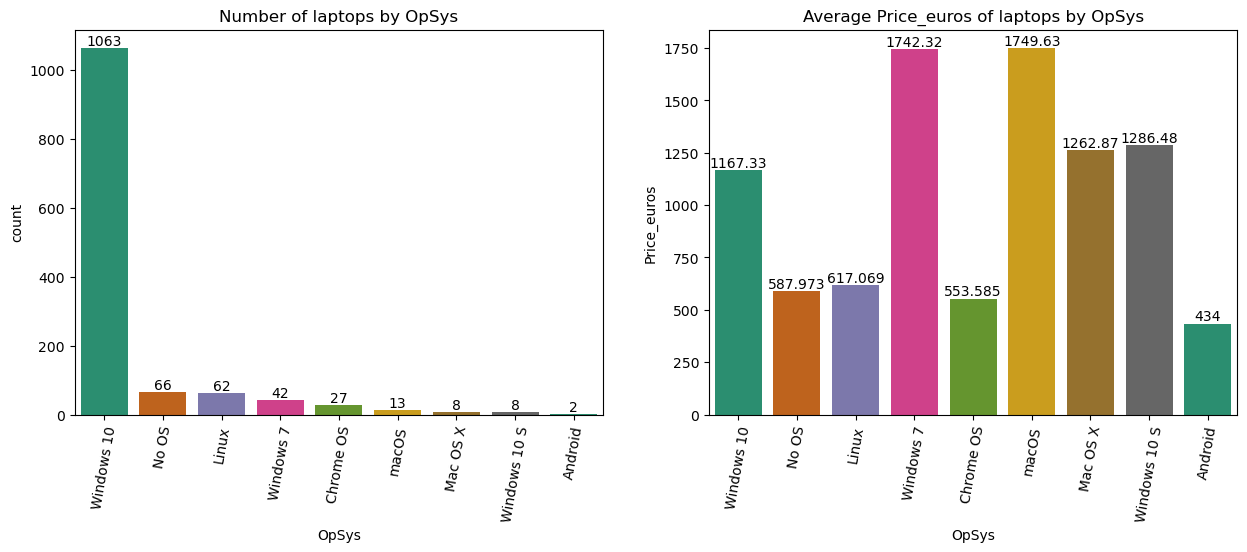

In [30]:
count_n_price_plot('OpSys','Price_euros')

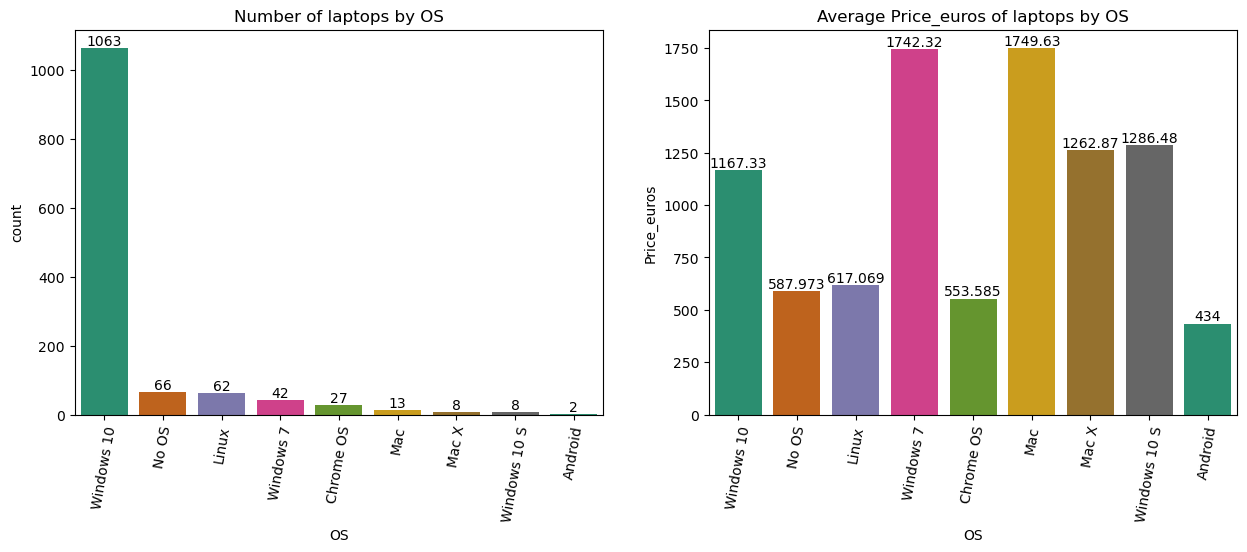

In [31]:
# preprocessing of OpSys field
def fetch_os(x):
    if x == 'macOS':
        return 'Mac'
    elif x == 'Mac OS X':
        return 'Mac X'
    else:
        return x
data['OS'] = data['OpSys'].apply(fetch_os)

count_n_price_plot('OS','Price_euros')
data.drop(columns='OpSys',inplace=True)

In [32]:
data['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      36
         ... 
1.55kg      1
2.54kg      1
1.18kg      1
2.72kg      1
4.0kg       1
Name: Weight, Length: 178, dtype: int64

In [33]:
# removing 'kg'and converting object data type to float data type
data['Weight (kg)'] = data['Weight'].str.replace("kg", "").astype(float) 
data.drop(columns='Weight',inplace=True)

In [34]:
# place Price column as last column in dataset
data['Price_New'] = data['Price_euros']
data.drop(columns='Price_euros',inplace=True)
data['Price_euros'] = data['Price_New']
data.drop(columns='Price_New',inplace=True)

In [35]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Screen Resolution,X_res,Y_res,Full HD,Quad HD+,...,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg),Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,2560,1600,0,1,...,Intel Core i5,2.3,8,0,128,0,Intel Iris,Mac,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,1440,900,1,0,...,Intel Core i5,1.8,8,0,0,128,Intel HD Graphics,Mac,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,1920x1080,1920,1080,1,0,...,Intel Core i5,2.5,8,0,256,0,Intel HD Graphics,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,2880,1800,0,0,...,Intel Core i7,2.7,16,0,512,0,AMD Radeon,Mac,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,2560,1600,0,1,...,Intel Core i5,3.1,8,0,256,0,Intel Iris,Mac,1.37,1803.60


<AxesSubplot:>

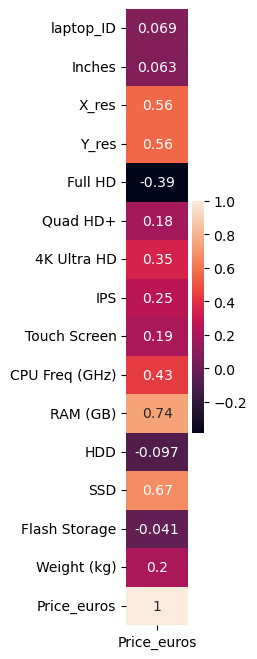

In [36]:
#correlation of price with other features
corr_data = pd.DataFrame(data.corr()['Price_euros'])
plt.figure(figsize = (1,8))
sns.heatmap(corr_data,annot=True)

In [37]:
data

,laptop_ID,Company,Product,TypeName,Inches,Screen Resolution,X_res,Y_res,Full HD,Quad HD+,...,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg),Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,2560,1600,0,1,...,Intel Core i5,2.3,8,0,128,0,Intel Iris,Mac,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,1440,900,1,0,...,Intel Core i5,1.8,8,0,0,128,Intel HD Graphics,Mac,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,1920x1080,1920,1080,1,0,...,Intel Core i5,2.5,8,0,256,0,Intel HD Graphics,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,2880,1800,0,0,...,Intel Core i7,2.7,16,0,512,0,AMD Radeon,Mac,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,2560,1600,0,1,...,Intel Core i5,3.1,8,0,256,0,Intel Iris,Mac,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,1920,1080,1,0,...,Intel Core i7,2.5,4,0,128,0,Intel HD Graphics,Windows 10,1.80,638.00
1287,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,3200,1800,0,0,...,Intel Core i7,2.5,16,0,512,0,Intel HD Graphics,Windows 10,1.30,1499.00
1288,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,1366,768,1,0,...,Intel Celeron Dual,1.6,2,0,0,64,Intel HD Graphics,Windows 10,1.50,229.00
1289,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,1366,768,1,0,...,Intel Core i7,2.5,6,1000,0,0,AMD Radeon,Windows 10,2.19,764.00


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

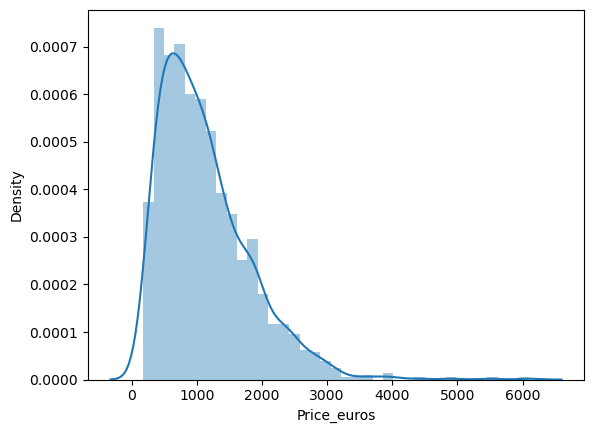

In [38]:
sns.distplot(data['Price_euros'])

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

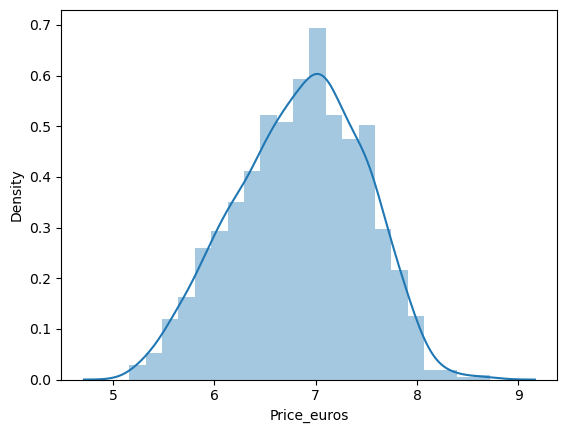

In [39]:
data['Price_euros'] = (np.log(data['Price_euros']))
sns.distplot(data['Price_euros'])

In [40]:
#Split dataset into independent and dependent (y and x)
x = data.drop(columns=['Price_euros','Screen Resolution','Product', 'laptop_ID']) 
y = data['Price_euros']
x.head()

,Company,TypeName,Inches,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD,IPS,Touch Screen,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg)
0,Apple,Ultrabook,13.3,2560,1600,0,1,0,1,0,Intel Core i5,2.3,8,0,128,0,Intel Iris,Mac,1.37
1,Apple,Ultrabook,13.3,1440,900,1,0,0,0,0,Intel Core i5,1.8,8,0,0,128,Intel HD Graphics,Mac,1.34
2,HP,Notebook,15.6,1920,1080,1,0,0,0,0,Intel Core i5,2.5,8,0,256,0,Intel HD Graphics,No OS,1.86
3,Apple,Ultrabook,15.4,2880,1800,0,0,1,1,0,Intel Core i7,2.7,16,0,512,0,AMD Radeon,Mac,1.83
4,Apple,Ultrabook,13.3,2560,1600,0,1,0,1,0,Intel Core i5,3.1,8,0,256,0,Intel Iris,Mac,1.37


In [41]:
#Split dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state= 41, test_size=0.2)
print("Total no. of Input Training examples:", len(x_train))
print("Total no. of Input Testing examples:", len(x_test))
print("Total no. of Output Training examples:", len(y_train))
print("Total no. of Output Testing examples:", len(y_test))

Total no. of Input Training examples: 1032
Total no. of Input Testing examples: 259
Total no. of Output Training examples: 1032
Total no. of Output Testing examples: 259


In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 614 to 931
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1032 non-null   object 
 1   TypeName        1032 non-null   object 
 2   Inches          1032 non-null   float64
 3   X_res           1032 non-null   int32  
 4   Y_res           1032 non-null   int32  
 5   Full HD         1032 non-null   int64  
 6   Quad HD+        1032 non-null   int64  
 7   4K Ultra HD     1032 non-null   int64  
 8   IPS             1032 non-null   int64  
 9   Touch Screen    1032 non-null   int64  
 10  CPU Name        1032 non-null   object 
 11  CPU Freq (GHz)  1032 non-null   float64
 12  RAM (GB)        1032 non-null   int32  
 13  HDD             1032 non-null   int64  
 14  SSD             1032 non-null   int64  
 15  Flash Storage   1032 non-null   int64  
 16  GPU             1032 non-null   object 
 17  OS              1032 non-null   

In [43]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1032 entries, 614 to 931
Series name: Price_euros
Non-Null Count  Dtype  
--------------  -----  
1032 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

#Encoding using OneHotEncoder
step1 = ColumnTransformer(transformers= [('clm', OneHotEncoder(sparse=False, handle_unknown = "ignore"),[0,1,10,16,17])], remainder='passthrough')

#Linear Regression
step2 = LinearRegression()
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('clm',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 10, 16, 17])])),
                ('step2', LinearRegression())])

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(x_test)
print("R2_Score", r2_score(y_pred, y_test))
print("MAE", mean_absolute_error(y_pred, y_test))

R2_Score 0.8225019982839283
MAE 0.19862090588958436


In [46]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
step2 = DecisionTreeRegressor(max_depth=12)
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('clm',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 10, 16, 17])])),
                ('step2', DecisionTreeRegressor(max_depth=12))])

In [47]:
y_pred = pipe.predict(x_test)
print("R2_Score", r2_score(y_pred, y_test))
print("MAE", mean_absolute_error(y_pred, y_test))

R2_Score 0.8183184470782996
MAE 0.18938822552034815


In [48]:
import pickle
data['Price_euros'] = (np.exp(data['Price_euros']))
data.to_csv(r'processed_laptop_dataset.csv')  # export the processed dataset as a csv
pickle.dump(data, open(r'processed_data.pickle', 'wb'))
pickle.dump(pipe, open(r'ml_model_pipe.pickle', 'wb'))

,Company,TypeName,Inches,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD,IPS,Touch Screen,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg)
193,Dell,2 in 1 Convertible,13.3,1920,1080,1,0,0,1,1,Intel Core i7,1.8,8,1000,0,0,Intel UHD Graphics,Windows 10,1.62


In [50]:
# Support Vector Regression
from sklearn.svm import SVR

step2 = SVR(kernel='rbf', C=1000, epsilon=0.1)
pipe = Pipeline([('step1', step1), ('step2', step2)])

In [51]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('clm',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 10, 16, 17])])),
                ('step2', SVR(C=1000))])

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(x_test)
print("R2_Score - ", r2_score(y_pred, y_test))
print("Mean Absolute Error - ", mean_absolute_error(y_pred, y_test))

R2_Score -  0.638983982444017
Mean Absolute Error -  0.246956410065903


In [53]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
step2 = RandomForestRegressor(n_estimators=350, random_state=0, max_depth=15)

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2_Score - ", r2_score(y_pred, y_test))
print("Mean Absolute Error - ", mean_absolute_error(y_pred, y_test))

R2_Score -  0.8868039603856633
Mean Absolute Error -  0.14822840818582025
